## Simple Linear Regression: Mean GDP per Capita vs Air Pollution 

This task regresses mean annual exposure of PM2.5 per country in the year 2017 on mean GDP per capita per country in 2017. This jupyter notebook uses data collected from the World Bank. 

In [28]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing and preparing the datasets
air_pollution = pd.read_csv('Air_Pollution_Data_2017.csv', index_col='Country Code')
air_pollution = air_pollution.rename(columns = {'2017': 'PM2.5'})
gdp_pcap = pd.read_csv('GDP_Per_Capita_2017.csv', index_col='Country Code')
gdp_pcap = gdp_pcap.rename(columns = {'2017': 'gdp_capita'})

dataset = gdp_pcap.merge(air_pollution, left_index = True, right_index = True)
dataset = dataset.drop(['Country Name_y'], axis=1)
dataset = dataset.rename(columns = {'Country Name_x': 'Country_Name'})
dataset = dataset.dropna(subset=['PM2.5'])

X = dataset.iloc[:, 1].values
X = X.reshape(-1,1)
y = dataset.iloc[:, 2].values
y = y.reshape(-1,1)

In [4]:
#Handling missing independent variables by inserting the mean for missing values
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(X)
X = imputer.transform(X)

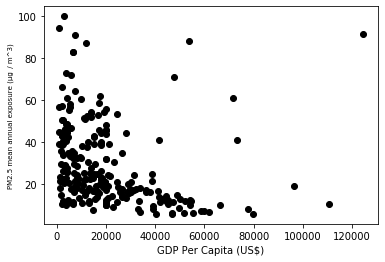

In [29]:
#For good practice visizualizing the relationship between X and y with a scatter plot
%matplotlib inline
plt.scatter(X, y, color = 'black')
plt.xlabel('GDP Per Capita (US$)')
plt.ylabel('PM2.5 mean annual exposure (μg / m^3)', size = 7)
plt.show()


The relationship does not appear to be linear. However, the purpose of this jupyter notebook is to display my ability to produce a simple linear regression model, so I will continue to build the model in this notebook.

In [12]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [15]:
#Feature Scaling - not used this time in order to keep interpretability of the model
''''from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

In [27]:
#Fitting a simple linear regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)


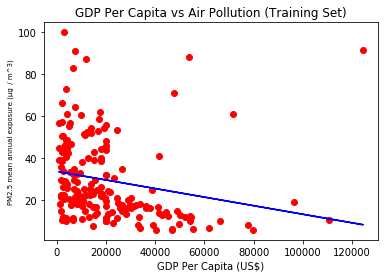

In [31]:
#Visualizing the Training set results
%matplotlib inline
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('GDP Per Capita vs Air Pollution (Training Set)')
plt.xlabel('GDP Per Capita (US$)')
plt.ylabel('PM2.5 mean annual exposure (μg / m^3)', size = 7)
plt.show()

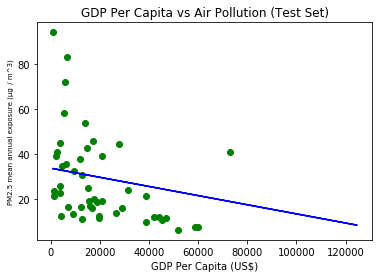

In [32]:
#Visualizing the Test set results
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('GDP Per Capita vs Air Pollution (Test Set)')
plt.xlabel('GDP Per Capita (US$)')
plt.ylabel('PM2.5 mean annual exposure (μg / m^3)', size = 7)
plt.show()